In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assignment 01

## Exercise 01.1

### 1.

Definition of different finite difference operations

In [2]:
def forward_diff(f, x, h):
    return (f(x+h) - f(x))/h

def backward_diff(f, x, h):
    return (f(x) - f(x-h))/h

def central_diff(f, x, h):
    return (f(x+h) - f(x-h))/(2*h)

### 2.

In [3]:
hvals = np.linspace(-100, 100, num=10000)
fd_vals = [forward_diff(np.exp, 0.0, h) for h in hvals]
abs_err_fd = [abs(fd_vals[i] - 1.0) for i in range(0,len(fd_vals))]
bd_vals = [backward_diff(np.exp, 0.0, h) for h in hvals]
abs_err_bd = [abs(bd_vals[i] - 1.0) for i in range(0,len(bd_vals))]
cd_vals = [central_diff(np.exp, 0.0, h) for h in hvals]
abs_err_cd = [abs(cd_vals[i] - 1.0) for i in range(0,len(cd_vals))]

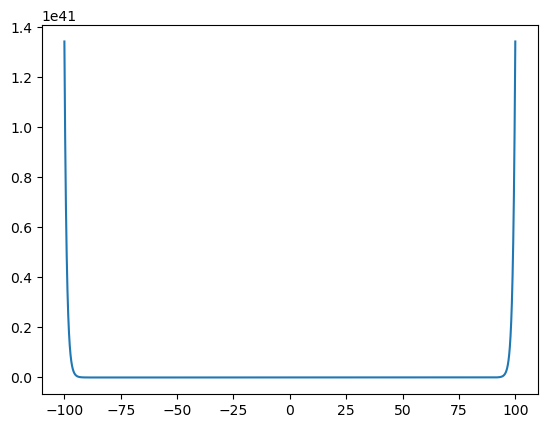

In [4]:
plt.plot(hvals, abs_err_cd)

After plotting for positive and negative values of the step size, we find that the forward derivative creates an error growing larger with h and being exponentially suppressed for low h, and for the backward derivative its vice versa. The central difference is symmetric. I guess that the behavior here reflects the monotonicity of the exponential function.

Restrict now to positive values of h and generate the log-log plats asked for in the exercise

In [5]:
hvals = np.linspace(0.01, 50, num=10000)
fd_vals = [forward_diff(np.exp, 0.0, h) for h in hvals]
abs_err_fd = [abs(fd_vals[i] - 1.0) for i in range(0,len(fd_vals))]
bd_vals = [backward_diff(np.exp, 0.0, h) for h in hvals]
abs_err_bd = [abs(bd_vals[i] - 1.0) for i in range(0,len(bd_vals))]
cd_vals = [central_diff(np.exp, 0.0, h) for h in hvals]
abs_err_cd = [abs(cd_vals[i] - 1.0) for i in range(0,len(cd_vals))]

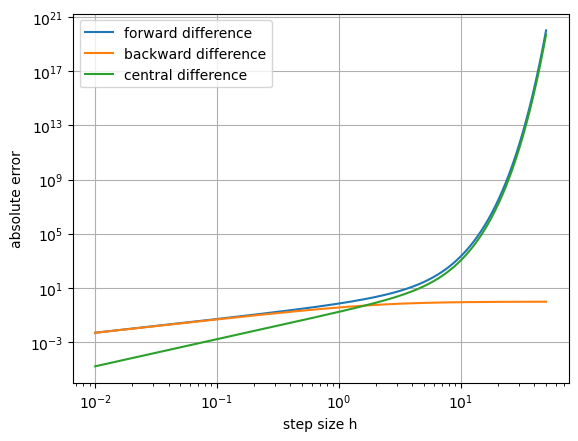

In [6]:
plt.loglog(hvals, abs_err_fd, label='forward difference')
plt.loglog(hvals, abs_err_bd, label='backward difference')
plt.loglog(hvals, abs_err_cd, label='central difference')
plt.grid(True)
plt.xlabel('step size h')
plt.ylabel('absolute error')
plt.legend(loc='upper left')

backward difference doesn't converge as fast as forward derivative and central derivative as h -> 0 but also does not diverge as badly for large h. As said before, the different behavior can be explained from the monotonicity properties of the exponential function.

## Exercise 01.2

### 1.

For the derivative in i direction, the central difference in a Taylor expansion goes as O(1) plus higher orders in h. If we consider then the absolute value of the error between the central difference and the actual derivative, the absolute value goes as h^2 plus higher orders.

### 2.

In [1]:
def gradient(func, eval_point, h):
    dim = len(eval_point)
    grad = np.zeros(dim)
    hmat = h * np.eye(dim)
    for ind in range(0,dim):
        grad[ind] = (func(eval_point + hmat[ind]) - func(eval_point - hmat[ind]))/(2*h)
    return grad

In [2]:
def test_func(x):
    return np.exp(2 * x[0]) + np.exp(x[1]) * np.sin(x[0] * x[1])

def true_grad(x):
    return [2 * np.exp(2 * x[0]) + x[1] * np.exp(x[1]) * np.cos(x[0] * x[1]), np.exp(x[1]) * np.sin(x[0] * x[1]) + x[0] * np.exp(x[1]) * np.cos(x[0] * x[1])]

Text(0, 0.5, 'absolute error')

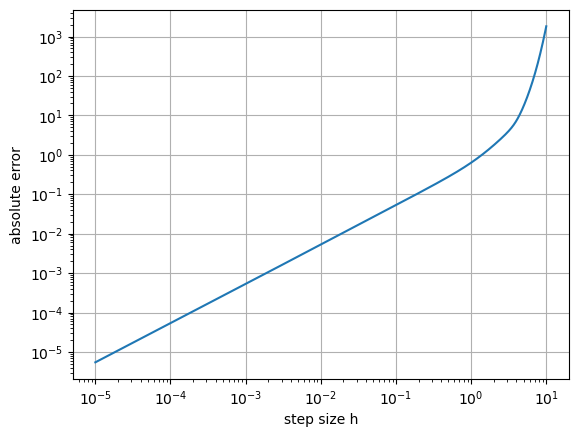

In [29]:
hvals = np.linspace(1e-5, 1e1, 10000)
abs_err_grad = [np.linalg.norm(gradient(test_func, [-1, 1], h) - true_grad([-1, 1])) for h in hvals]
plt.loglog(hvals, abs_err_grad)
plt.grid(True)
plt.xlabel('step size h')
plt.ylabel('absolute error')

We plot here the norm of the difference vector between numerical gradient and exact gradient.

The gradient in numpy takes a list of function values and gives the corresponding gradient. As default, step size between the inputs is assumed.

In [62]:
x_change = np.array([[-1 - 1e-4, 1], [-1, 1], [-1 + 1e-4, 1]])
y_change = np.array([[-1, 1- 1e-4], [-1, 1], [-1, 1 + 1e-4]])
f_in_x_vals = [test_func(x) for x in x_change]
f_in_y_vals = [test_func(x) for x in y_change]
print('grad in x at [-1, 1] = ', np.gradient(np.array(f_in_x_vals), 1e-4)[1])
print('grad in y at [-1, 1] = ', np.gradient(np.array(f_in_y_vals), 1e-4)[1])
print('my_grad at [-1, 1] = ', gradient(test_func, [-1, 1], 1e-4))

grad in x at [-1, 1] =  1.7393645057461882
grad in y at [-1, 1] =  -3.7560492243660093
my_grad at [-1, 1] =  [ 1.73936451 -3.75604922]


It's exactly the same. The step size h used in our own algorithm corresponds to the step size in x and y direction that is needed to generate the data to put into the numpy gradient.